In [1]:
import scipy as sp
import scipy.interpolate
file = open("salt2_template_0.dat")
lines = file.readlines()
file.close()
    
xtemp = []
ytemp = []
ztemp = []
    
for line in lines:
    
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    xtemp.append(co[0])
    ytemp.append(co[1])
    ztemp.append(co[2])

In [2]:
import numpy as np

xtemp = np.array(xtemp, dtype=float)
ytemp = np.array(ytemp, dtype=float)
ztemp = np.array(ztemp, dtype=float)

In [3]:
print(xtemp)
print(ytemp)
print(ztemp)

[-20. -20. -20. ...  50.  50.  50.]
[2000. 2010. 2020. ... 9180. 9190. 9200.]
[0.         0.         0.         ... 0.02343584 0.02359484 0.02374158]


In [4]:
ztemp = ztemp/max(ztemp)

In [5]:
import scipy.interpolate as interp

gradex,gradey = np.meshgrid(np.linspace(min(xtemp),max(xtemp),70),np.linspace(min(ytemp),max(ytemp),500))

f = interp.griddata((xtemp,ytemp),ztemp,(gradex,gradey),method='linear')


In [6]:
print(f)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.31166350e-06 -1.46918791e-05 ... -6.39335036e-05
  -7.24989410e-05 -7.33733544e-05]
 [ 0.00000000e+00 -1.23743019e-05 -5.09632284e-05 ... -2.34189409e-04
  -2.63115666e-04 -2.66307737e-04]
 ...
 [ 0.00000000e+00  1.93457648e-02  8.15692412e-02 ...  2.94484787e-02
   3.65052141e-02  4.38620539e-02]
 [ 0.00000000e+00  2.01350073e-02  8.47180709e-02 ...  2.95165779e-02
   3.67569191e-02  4.43149373e-02]
 [ 0.00000000e+00  2.08756287e-02  8.79273234e-02 ...  2.96052250e-02
   3.70004774e-02  4.47240316e-02]]


In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
'''
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')

def init():
    # Plot the surface.
    ax.plot_surface(gradex, gradey, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)

fn = 'M0salt'

ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)
'''

"\nfig = plt.figure()\nax = Axes3D(fig)\nplt.xlabel('time (days)')\nplt.ylabel('wavelength ($\\AA$)')\n\ndef init():\n    # Plot the surface.\n    ax.plot_surface(gradex, gradey, f, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=True)\n    return fig,\n\ndef animate(i):\n    # azimuth angle : 0 deg to 360 deg\n    ax.view_init(elev=10, azim=i*4)\n    return fig,\n\nani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)\n\nfn = 'M0salt'\n\nani.save(fn+'.gif',writer='imagemagick',fps=1000/50)\n"

In [8]:
file = open("M0.dat")
lines = file.readlines()
file.close()
    
xsub = []
ysub = []
zsub = []
    
for line in lines:
    
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    xsub.append(co[0])
    ysub.append(co[1])
    zsub.append(co[2])

In [9]:
xsub = np.array(xsub, dtype=float)
ysub = np.array(ysub, dtype=float)
zsub = np.array(zsub, dtype=float)

In [10]:
xsubn = []
ysubn = []
zsubn = []


for i in range(0,len(zsub)):
    
    if -3< xsub[i] < 3:
        
        if 3900 < ysub[i] < 4100:
            
            xsubn.append(xsub[i])
            ysubn.append(ysub[i])
            zsubn.append(zsub[i])

In [11]:
#zsubn = (zsubn/max(zsubn))*100

In [12]:
zsub = zsub/max(zsubn)

In [13]:
fsub = interp.griddata((xsub,ysub),zsub,(gradex,gradey),method='linear')

In [14]:
gradey

array([[2000.        , 2000.        , 2000.        , ..., 2000.        ,
        2000.        , 2000.        ],
       [2014.42885772, 2014.42885772, 2014.42885772, ..., 2014.42885772,
        2014.42885772, 2014.42885772],
       [2028.85771543, 2028.85771543, 2028.85771543, ..., 2028.85771543,
        2028.85771543, 2028.85771543],
       ...,
       [9171.14228457, 9171.14228457, 9171.14228457, ..., 9171.14228457,
        9171.14228457, 9171.14228457],
       [9185.57114228, 9185.57114228, 9185.57114228, ..., 9185.57114228,
        9185.57114228, 9185.57114228],
       [9200.        , 9200.        , 9200.        , ..., 9200.        ,
        9200.        , 9200.        ]])

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
'''
fig = plt.figure()
ax = Axes3D(fig)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')

def init():
    # Plot the surface.
    ax.plot_surface(gradex, gradey, fsub, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)

fn = 'M0my'

ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)

'''

"\nfig = plt.figure()\nax = Axes3D(fig)\nplt.xlabel('time (days)')\nplt.ylabel('wavelength ($\\AA$)')\n\ndef init():\n    # Plot the surface.\n    ax.plot_surface(gradex, gradey, fsub, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=True)\n    return fig,\n\ndef animate(i):\n    # azimuth angle : 0 deg to 360 deg\n    ax.view_init(elev=10, azim=i*4)\n    return fig,\n\nani = animation.FuncAnimation(fig, animate, init_func=init, frames=90, interval=50, blit=True)\n\nfn = 'M0my'\n\nani.save(fn+'.gif',writer='imagemagick',fps=1000/50)\n\n"

In [16]:
xx_temp = np.linspace(min(xtemp),max(xtemp),70)
yy_temp = np.linspace(min(ytemp),max(ytemp),500)

In [17]:
xx_temp

array([-20.        , -18.98550725, -17.97101449, -16.95652174,
       -15.94202899, -14.92753623, -13.91304348, -12.89855072,
       -11.88405797, -10.86956522,  -9.85507246,  -8.84057971,
        -7.82608696,  -6.8115942 ,  -5.79710145,  -4.7826087 ,
        -3.76811594,  -2.75362319,  -1.73913043,  -0.72463768,
         0.28985507,   1.30434783,   2.31884058,   3.33333333,
         4.34782609,   5.36231884,   6.37681159,   7.39130435,
         8.4057971 ,   9.42028986,  10.43478261,  11.44927536,
        12.46376812,  13.47826087,  14.49275362,  15.50724638,
        16.52173913,  17.53623188,  18.55072464,  19.56521739,
        20.57971014,  21.5942029 ,  22.60869565,  23.62318841,
        24.63768116,  25.65217391,  26.66666667,  27.68115942,
        28.69565217,  29.71014493,  30.72463768,  31.73913043,
        32.75362319,  33.76811594,  34.7826087 ,  35.79710145,
        36.8115942 ,  37.82608696,  38.84057971,  39.85507246,
        40.86956522,  41.88405797,  42.89855072,  43.91

In [18]:
supref = interp.griddata((xtemp,ytemp),ztemp,(gradex,gradey),method='cubic')

In [19]:
supsub = interp.griddata((xsub,ysub),zsub,(gradex,gradey),method='cubic')

In [20]:
len(supsub[0])

70

In [21]:
import math
xx = []
yy = []
zz = []
for i in range(0,len(xx_temp)):
    for j in range(0,len(yy_temp)):
        
        if math.isnan(supref[j][i]) == False and math.isnan(supsub[j][i]) == False and supref[j][i] != 0:
            
            xx.append(xx_temp[i])
            yy.append(yy_temp[j])
            zz.append(abs((supref[j][i] - supsub[j][i])/supref[j][i]))

In [22]:
len(yy)

27851

In [23]:
gradex,gradey = np.meshgrid(np.linspace(-10,50,61),np.linspace(3800,7500,500))

fcomp = interp.griddata((xx,yy),zz,(gradex,gradey),method='linear')

In [24]:
len(gradey)

500

<IPython.core.display.Javascript object>


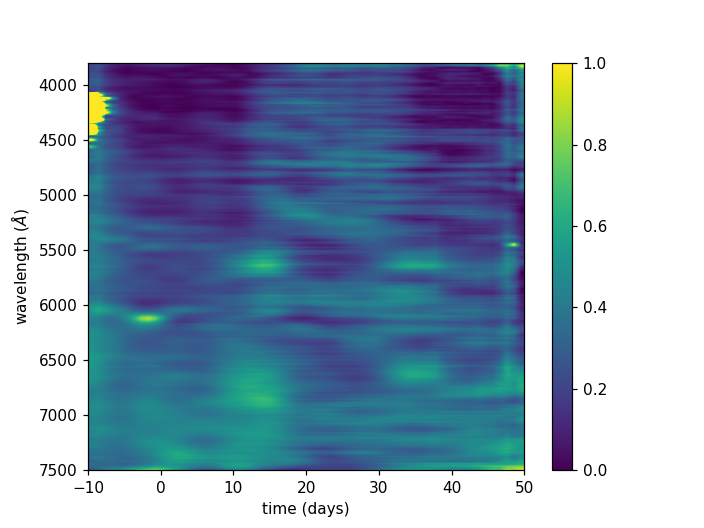

In [33]:
import matplotlib.cm as cm
import numpy as np
%matplotlib notebook
#x, y, z = np.loadtxt('density.dat', unpack=True)
#z = z.reshape(50,50)
plt.imshow(fcomp, extent=(np.amin(gradex), np.amax(gradex), np.amax(gradey), np.amin(gradey)), cmap=cm.viridis, aspect='auto', interpolation = 'bilinear')
plt.colorbar()
plt.clim(0,1)
plt.xlabel('time (days)')
plt.ylabel('wavelength ($\AA$)')
plt.savefig('densityplot.png')
plt.show()


In [26]:
np.amin(gradex)

-10.0

In [27]:
x_grid = np.linspace(-10,50,61)
y_grid = np.linspace(3800,7500,500)
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

<IPython.core.display.Javascript object>


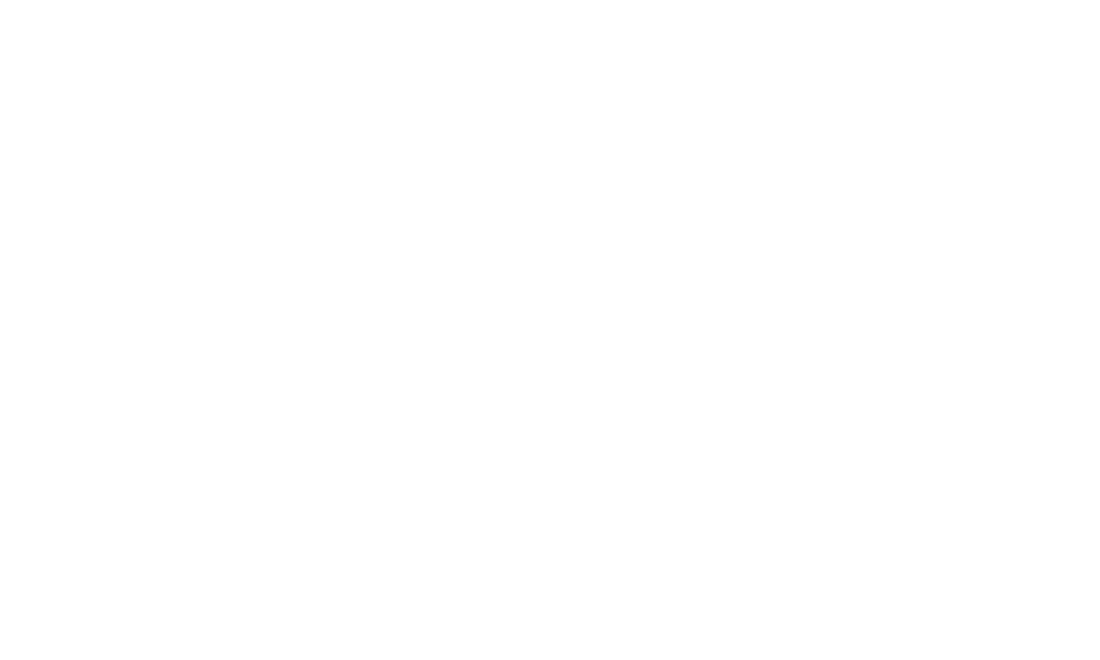

NameError: name 'ax3' is not defined

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import scipy.interpolate as interp
Z = interp.griddata((xsub,ysub),zsub,(B1,B2),method='cubic',fill_value = 0,rescale=True)
#Z = splinemean(B1, B2)
%matplotlib notebook
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
#ax.scatter3D(xx_test,yy_test,mean_flux, c='r')
ax3.set_xlim(3500, 7500)
ax3.set_ylim(-10, 50)
#ax3.set_zlim(-1, 1)

plt.show()